# How to determine whether or not 20 million people from a larger population like a particular movie idea?

## Purpose of the document

To describe an algorithm using which I can find out whether or not at least 20 million people (out of a much larger population) will like a particular idea, based on a poll with 10-100 people.


## Playground

Number of respondents

In [2]:
respondents_count = 10 # 10 for 10 people, 100 for 100 etc.

Required number of people who like the movie

In [3]:
required_lovers = 20000000 # e. g. 20 million

Total population size

In [4]:
total_population = 140000000 # e. g. 140 million for Russia, 330 million for the US

In [5]:
P = required_lovers / total_population

In [6]:
print(P)

0.14285714285714285


In [7]:
1/7

0.14285714285714285

Plot a binomial distribution with parameters `(respondents_count, P)`

[1 2 2 2 2 0 0 0 2 1]


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

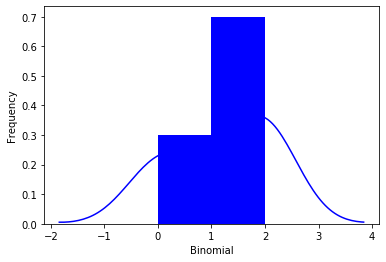

In [8]:
import seaborn as sb, numpy as np
from scipy.stats import binom
#data_binom =binom.rvs(size=10,n=20,p=0.8)
data_binom = binom.rvs(n=respondents_count,p=P,loc=0,size=10)
print(data_binom)
ax = sb.distplot(data_binom,kde=True,color='blue',hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

Take the number of successes in the sample.

In [9]:
successes_in_sample = 80

> see how likely that was to have happened in this distribution



Another approach from [here](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/):

$P(X) = \frac{n!}{(n - X)!X!}(p)^X*(1-p)^{n-X}$

 * $n$ - number of trials. In our case number of respondents.
 * $X$ - total number of successes.
 * $p$ - probability of success of any given trial, $P$ (1/7 in case of 140 million people in the population)

In [10]:
import math

def bin_prob(x, n, p):
    n_fact = math.factorial(n)
    n_minus_x_fact = math.factorial(n-x)
    x_fact = math.factorial(x)
    return n_fact/(n_minus_x_fact*x_fact)*(p**x)*((1-p)**(n-x))

Let's look at the whole thing for 140 million population and a 100 trials.

In [11]:
bin_prob(1.0, 100.0, 1/7) # 1 success in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

3.3664315361698167e-06

In [12]:
bin_prob(100.0, 100.0, 1/7) # 100 successes in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

3.0916904080902036e-85

What is the formula behind `bin_prob` called?

In [13]:
import math
import scipy.stats

# n - Number of total bets
# p - Probability of getting "red" at the roulette
# x - Maximum number of successful bets
def bin_prob2(x, n, p): 
    hh = scipy.stats.binom(n, p)
    total_p = 0.0
    for k in range(1, x + 1):  # DO NOT FORGET THAT THE LAST INDEX IS NOT USED
        total_p += hh.pmf(k)
    return total_p

In [14]:
bin_prob2(1, 100.0, 1/7) # 1 success in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

3.3664315361697307e-06

In [15]:
bin_prob2(100, 100.0, 1/7) # 1 success in a sample of 100 trials, 140 mill. population, 20 mill. req. audience

0.9999997980141033

In [16]:
# required_approval_pop = required number of people who like the log line in the population (e. g. 20 million)
# pop_size = population size (e. g. 140 million)
# sample_size = size of the sample (number of respndents)
def render_table(required_approval_pop, pop_size, sample_size):
    html = []

    html.append("<table>")
    html.append("<tr>")
    html.append("<th>")
    html.append("Number of people liking the logline")
    html.append("</th>")
    html.append("<th>")
    html.append("Probability that " + str(required_approval_pop) + " out " + str(pop_size) + " will like it")
    html.append("</th>")
    html.append("</tr>")

    for x in range(1, sample_size+1):
        prob = bin_prob2(x, sample_size, required_approval_pop/pop_size)
        html.append("<tr>")
        html.append("<td>")
        html.append(str(x))
        html.append("</td>")
        html.append("<td>")
        html.append( "{0:.2%}".format(prob))
        html.append("</td>")
        html.append("</tr>")
    html.append("</table>")
    return ''.join(html)

# Example 1: Sample of 100 people, total population 140 million

In [17]:
from IPython.core.display import HTML
HTML(render_table(required_approval_pop=20000000, pop_size=140000000, sample_size=100))


Number of people liking the logline,Probability that 20000000 out 140000000 will like it
1,0.00%
2,0.00%
3,0.02%
4,0.08%
5,0.27%
6,0.79%
7,1.95%
8,4.18%
9,8.00%
10,13.78%


# Example 2: Sample of 10 people, total population 140 million

In [18]:
from IPython.core.display import HTML
HTML(render_table(required_approval_pop=20000000, pop_size=140000000, sample_size=10))


Number of people liking the logline,Probability that 20000000 out 140000000 will like it
1,35.68%
2,62.43%
3,74.33%
4,77.79%
5,78.49%
6,78.58%
7,78.59%
8,78.59%
9,78.59%
10,78.59%


## Example 3: Sample of 100 people, total population 330 million

In [19]:
from IPython.core.display import HTML
HTML(render_table(required_approval_pop=20000000, pop_size=330000000, sample_size=100))


Number of people liking the logline,Probability that 20000000 out 330000000 will like it
1,1.24%
2,5.21%
3,13.58%
4,26.67%
5,42.88%
6,59.44%
7,73.79%
8,84.55%
9,91.64%
10,95.81%


## Example 4: Sample of 10 people, total population 330 million

In [20]:
from IPython.core.display import HTML
HTML(render_table(required_approval_pop=20000000, pop_size=330000000, sample_size=10))


Number of people liking the logline,Probability that 20000000 out 330000000 will like it
1,34.53%
2,44.55%
3,46.27%
4,46.47%
5,46.48%
6,46.48%
7,46.48%
8,46.48%
9,46.48%
10,46.48%


## Example 4: Sample of 20 people, total population 330 million

In [21]:
from IPython.core.display import HTML
HTML(render_table(required_approval_pop=20000000, pop_size=330000000, sample_size=20))


Number of people liking the logline,Probability that 20000000 out 330000000 will like it
1,36.95%
2,59.60%
3,68.37%
4,70.77%
5,71.27%
6,71.35%
7,71.36%
8,71.36%
9,71.36%
10,71.36%


# Links

 * https://www.mathsisfun.com/data/binomial-distribution.html
 * https://gist.github.com/fbrundu/746ea5aee0b73a2ddd26